# ADS 509 Sentiment Assignment - Mendelina Lopez

This notebook holds the Sentiment Assignment for Module 6 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In a previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we apply sentiment analysis to those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 


In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from string import punctuation

from nltk.corpus import stopwords

sw = stopwords.words("english")

In [10]:
# Add any additional import statements you need here
from nltk.corpus import opinion_lexicon
import nltk
from nltk.tokenize import word_tokenize
from matplotlib import pyplot as plt

In [3]:
# change `data_location` to the location of the folder on your machine.
data_location = "C:/Users/mendi/Desktop/USD Class Files/ADS 509/M1 Results/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

positive_words_file = "positive-words.txt"
negative_words_file = "negative-words.txt"
tidy_text_file = "tidytext_sentiments.txt"

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A Pandas data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [4]:
# Read in the lyrics data
artists = []
songs = []
lyrics = []
for item in os.listdir(data_location + lyrics_folder) :
    if os.path.isdir(data_location + lyrics_folder + item) :
        for lyric_page in os.listdir(data_location + lyrics_folder + item) :
            artist,song = lyric_page.split("_")
 
            song = song.replace(".txt","")
            artists.append(artist)
            songs.append(song)
 
            with open(data_location + lyrics_folder + item + "/" + lyric_page) as infile :
                next(infile) # skip title
                next(infile) # skip blank
                next(infile) # skip blank
                next(infile) # skip final blank
 
                lyrics.append(infile.read())

lyrics_data = pd.DataFrame()
lyrics_data['artist'] = artists
lyrics_data['song'] = songs
lyrics_data["lyrics"] = lyrics

In [5]:
# Read in the twitter data
twitter_files = os.listdir(data_location + twitter_folder)
desc_files = [f for f in twitter_files if "followers_data" in f]
twitter_data = defaultdict(list)
for f in desc_files :
    artist = f.split("_")[0]
 
    with open(data_location + twitter_folder + "/"+ f,'r', encoding='utf8') as infile :
        next(infile)
        for idx, line in enumerate(infile.readlines()) :
            line = line.strip().split("\t")
            if len(line) == 7 :
                twitter_data[artist].append(line[6])

In [6]:
# Read in the positive and negative words and the
# tidytext sentiment. Store these so that the positive
# words are associated with a score of +1 and negative words
# are associated with a score of -1. You can use a dataframe or a 
# dictionary for this.

# Let's create a dictionary which we can use for scoring our review text
pos_score = 1
neg_score = -1
word_dict = {}

# Adding the positive words to the dictionary
for word in opinion_lexicon.positive():
    word_dict[word] = pos_score
    
# Adding the negative words to the dictionary
for word in opinion_lexicon.negative():
    word_dict[word] = neg_score
    
def bing_liu_score(text):
    sentiment_score = 0
    bag_of_words = word_tokenize(text.lower())
    for word in bag_of_words:
        if word in word_dict:
            sentiment_score += word_dict[word]
    return sentiment_score / len(bag_of_words)

## Sentiment Analysis on Songs

In this section, score the sentiment for all the songs for both artists in your data set. Score the sentiment by manually calculating the sentiment using the combined lexicons provided in this repository. 

After you have calculated these sentiments, answer the questions at the end of this section.


In [17]:
# for 1Q
lyrics_data['Bing_Liu_Score'] = lyrics_data['lyrics'].apply(bing_liu_score)
lyrics_data.groupby('artist',as_index=False)['Bing_Liu_Score'].mean()

,artist,Bing_Liu_Score
0,cher,0.013219
1,robyn,0.009095


In [55]:
# for 2Q [highest sentiment]
lyrics_data[['artist','song','lyrics','Bing_Liu_Score']].nlargest(10,['Bing_Liu_Score'])

,artist,song,lyrics,Bing_Liu_Score
181,cher,mylove,When I go away\nI know my heart can stay with ...,0.221675
380,robyn,loveisfree,"Free\nLove is free, baby\nFree\nLove is free, ...",0.177936
179,cher,moveme,"Move me\nLove the way you move me, baby\nGroov...",0.158824
155,cher,loveandunderstanding,"Here, here in this world\nWhere do we go? Wher...",0.140523
116,cher,ilovemakinlovetoyou,"Aw, feels so fine every time\nOoh, I love maki...",0.105263
301,cher,willyoulovemetomorrow,Tonight you're mine completely \nYou give your...,0.103704
140,cher,justenoughtokeepmehanginon,"It's true, you got me wrapped around your fing...",0.102439
114,cher,iknowyoudontloveme,Uh uh uh\nYou don't love me\nYes I know\nUh-uh...,0.101266
236,cher,strongenough,I don't need your sympathy\nThere's nothing yo...,0.100592
182,cher,mylove318663,I heard you wanna be somebody\nBut you're alre...,0.099678


In [56]:
# for 3Q [lowest sentiment]
lyrics_data[['artist','song','lyrics','Bing_Liu_Score']].nsmallest(10,['Bing_Liu_Score'])

,artist,song,lyrics,Bing_Liu_Score
342,robyn,dontfuckingtellmewhattodo,My drinking is killing me\nMy drinking is kill...,-0.171946
343,robyn,dontfuckingtellmewhattodo114520,My drinking is killing me\nMy drinking is kill...,-0.171946
334,robyn,criminalintent,"Somebody alert the authorities, I got criminal...",-0.101961
42,cher,crymyselftosleep,"Every night, I lay my head\nOn my pillow on my...",-0.094203
196,cher,outrageous,"Outrageous, outrageous\n(They say) I'm outrage...",-0.082143
133,cher,iwalkonguildedsplinters,"Some people think they jive me, but I know the...",-0.076923
303,cher,withorwithoutyou,I don't want to live without you\nGod it hurts...,-0.066986
333,robyn,crashandburngirl,I should write a song about you and all the sh...,-0.066869
63,cher,dressedtokill,I slip into my shoes and slide into the night\...,-0.059480
139,cher,julie,Cheap lips lie into hungry ears \nWell backsli...,-0.057851


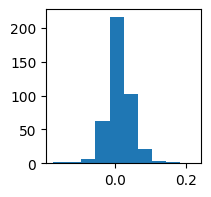

In [16]:
# for 4Q
fig, ax = plt.subplots(figsize = (2,2))
ax.hist(lyrics_data['Bing_Liu_Score'])
plt.show()

### Questions

1Q: Overall, which artist has the higher average sentiment per song? 

A: Based on the above table, it looks like cher has the higher average sentiment score.

---

2Q: For your first artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score? 

A: Cher's three songs with the highest sentiment are: 'mylove', 'moveme', and 'loveandunderstanding'. The three songs with the lowest sentiment are: 'crymyselftosleep', 'outrageous', and iwalkonguildedsplinters'. Love seems to drive the sentiment score.

---

3Q: For your second artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score? 

A: Robyn's song with the highest sentiment score is 'loveisfree'. The three songs with the lowest sentiment are: 'dontfuckingtellmewhattodo', 'criminalintent', and 'crashandburngirl'. This artist's lyrics seem a little more dramatic and driven more on rage.

---

4Q: Plot the distributions of the sentiment scores for both artists. You can use `seaborn` to plot densities or plot histograms in matplotlib.




## Sentiment Analysis on Twitter Descriptions

In this section, define two sets of emojis you designate as positive and negative. Make sure to have at least 10 emojis per set. You can learn about the most popular emojis on Twitter at [the emojitracker](https://emojitracker.com/). 

Associate your positive emojis with a score of +1, negative with -1. Score the average sentiment of your two artists based on the Twitter descriptions of their followers. The average sentiment can just be the total score divided by number of followers. You do not need to calculate sentiment on non-emoji content for this section.

In [22]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

emojii = defaultdict(list)
for artist in twitter_data :
    for emo in twitter_data[artist] :
        emojii[artist].extend([ch for ch in emo if emoji.is_emoji(ch)])

In [23]:
emoji['Bing_Liu_Score'] = emoji['artist'].apply(bing_liu_score)
emoji.groupby('artist',as_index=False)['Bing_Liu_Score'].mean()

TypeError: 'module' object is not subscriptable

Q: What is the average sentiment of your two artists? 

A: <!-- Your answer here --> 

---

Q: Which positive emoji is the most popular for each artist? Which negative emoji? 

A: <!-- Your answer here --> 

